In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data_SALE_LIST = pd.read_csv('SALE_LIST.csv', sep=';')
data_SALE_LIST['date'] = data_SALE_LIST['date'].apply(lambda x: x[6:])

dt_PRODUCT_LIST = pd.read_csv('PRODUCT_LIST.CSV', encoding='cp1251')
Temp = dt_PRODUCT_LIST['Product_code;Product_name;;'].apply(lambda x: str.split(x, ';'))
dt_PRODUCT_LIST['product_code'] = Temp.apply(lambda x: x[0])
dt_PRODUCT_LIST['product_name'] = Temp.apply(lambda x: x[1])
dt_PRODUCT_LIST = dt_PRODUCT_LIST.drop(['Product_code;Product_name;;'], axis=1)
dt_PRODUCT_LIST

,product_code,product_name
0,821001,Кофе ЭСПРЕССО 30 мл
1,821002,Кофе ДОППИО 60мл
2,821003,Кофе РИСТРЕТТО 20 мл
3,821004,Фильтр кофе Верньяно250мл
4,821005,Кофе ЛУНГО 50 мл
...,...,...
9781,894094,Тофи-тофу 160г
9782,894095,Япончики 90г
9783,894096,Мо Мо 120г
9784,894097,Салат грейпфрут-манго п/ф


In [47]:
product_sales_volume = data_SALE_LIST.groupby('product_code').sum()

# отсортированный по возрастанию объем продажи продукта
product_sales_volume_sort = product_sales_volume.sort_values(by='product_count', ascending=False)

best_selling_products = product_sales_volume_sort.head(10)

worst_selling_products = product_sales_volume_sort.tail(10)
data_SALE_LIST

,date,product_code,rest_code,product_count
0,2009,824021,ќзерный,4
1,2009,824068,ќзерный,1
2,2009,824070,ќзерный,2
3,2009,824073,ќзерный,1
4,2009,824074,ќзерный,1
...,...,...,...,...
135915,2013,892545,ћечта,3
135916,2013,892545,ћечта,1
135917,2013,892545,ћечта,3
135918,2013,892545,ћечта,4


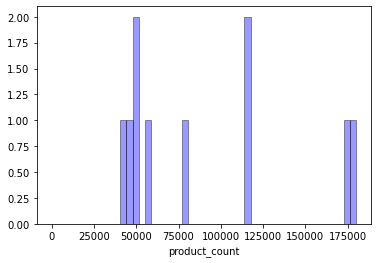

In [4]:
sns.distplot(best_selling_products['product_count'], hist=True, kde=False,  norm_hist=False, bins=np.linspace(0, 180000), color='blue', hist_kws={'edgecolor':'black'})

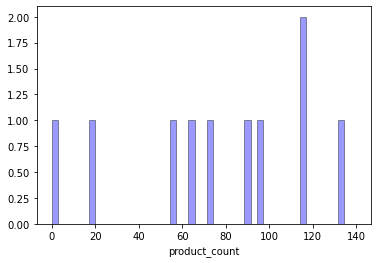

In [5]:
sns.distplot(worst_selling_products['product_count'], hist=True, kde=False,  norm_hist=False, bins=np.linspace(0, 140), color='blue', hist_kws={'edgecolor':'black'})

In [6]:
product_sales_volume.reset_index()

,product_code,product_count
0,821001,115551
1,821002,16664
2,821005,26838
3,821012,115652
4,821146,23335
...,...,...
105,892533,744
106,892545,56
107,892554,146
108,892557,90


In [108]:
data_rest_kzernii = data_SALE_LIST['rest_code'] == 'ќзерный'
one_rest_product = data_SALE_LIST[data_rest_kzernii].groupby('product_code').sum().reset_index()
one_rest_product_head5 = one_rest_product.sort_values(by='product_count', ascending=False).head()
one_rest_product_tail5 = one_rest_product.sort_values(by='product_count', ascending=False).tail()

In [109]:
two_rest_product = data_SALE_LIST[~data_rest_kzernii].groupby('product_code').sum().reset_index()
two_rest_product_head5 = two_rest_product.sort_values(by='product_count', ascending=False).head()
two_rest_product_tail5 = two_rest_product.sort_values(by='product_count', ascending=False).tail()

In [110]:
one_rest_product_head5 = one_rest_product_head5.astype({"product_code": str})
one_rest_product_tail5 = one_rest_product_tail5.astype({"product_code": str})
two_rest_product_head5 = two_rest_product_head5.astype({"product_code": str})
two_rest_product_tail5 = two_rest_product_tail5.astype({"product_code": str}) 

<BarContainer object of 5 artists>

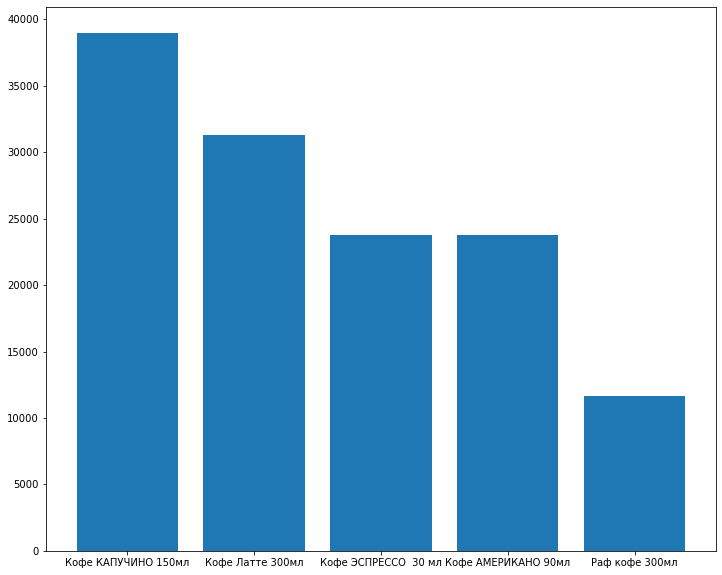

In [119]:
one_rest_product_head5 = pd.merge(one_rest_product_head5, dt_PRODUCT_LIST, on='product_code')
fig, ax = plt.subplots(1, 1, figsize = (12,10))
plt.bar(one_rest_product_head5['product_name'], one_rest_product_head5['product_count'])

<BarContainer object of 5 artists>

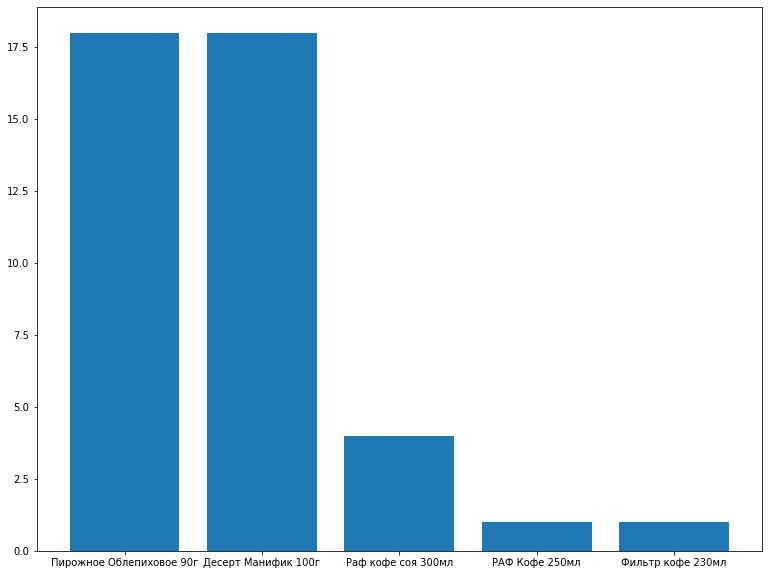

In [122]:
one_rest_product_tail5 = pd.merge(one_rest_product_tail5, dt_PRODUCT_LIST, on='product_code')
fig, ax = plt.subplots(1, 1, figsize = (13, 10))
plt.bar(one_rest_product_tail5['product_name'], one_rest_product_tail5['product_count'])

<BarContainer object of 5 artists>

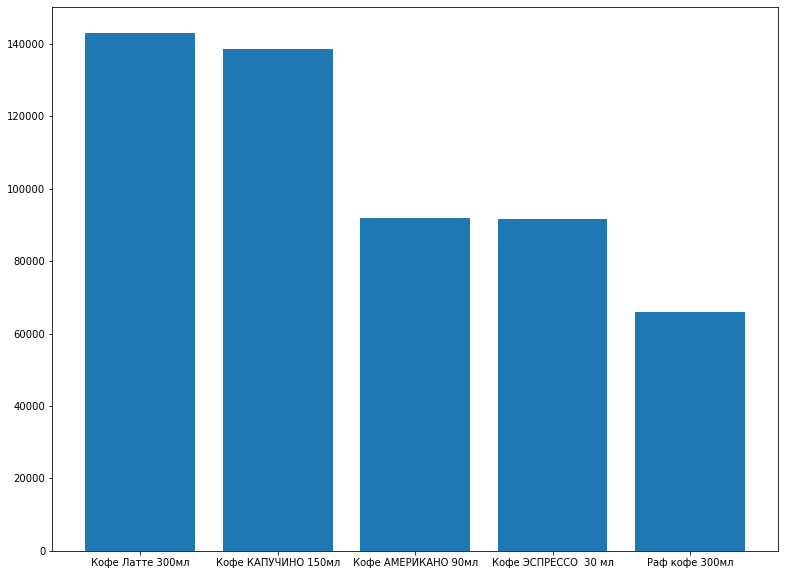

In [125]:
two_rest_product_head5 = pd.merge(two_rest_product_head5, dt_PRODUCT_LIST, on='product_code')
fig, ax = plt.subplots(1, 1, figsize = (13, 10))
plt.bar(two_rest_product_head5['product_name'], two_rest_product_head5['product_count'])

<BarContainer object of 5 artists>

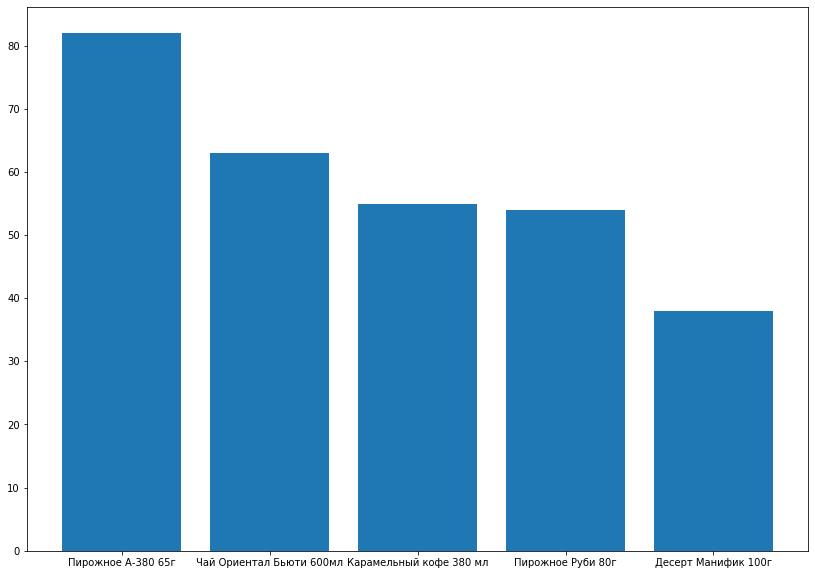

In [128]:
#two_rest_product_tail5 = pd.merge(two_rest_product_tail5, dt_PRODUCT_LIST, on='product_code')
fig, ax = plt.subplots(1, 1, figsize = (14, 10))
plt.bar(two_rest_product_tail5['product_name'], two_rest_product_tail5['product_count'])

<BarContainer object of 5 artists>

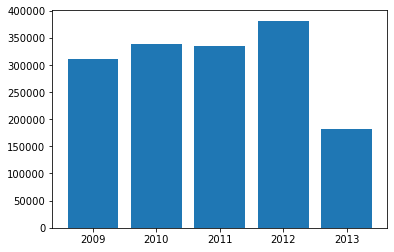

In [14]:
date_group = data_SALE_LIST.groupby('date').sum().reset_index()
plt.bar(date_group['date'], date_group['product_count'])

In [15]:
one_rest_date = data_SALE_LIST[data_rest_kzernii].groupby('date').sum().reset_index()
two_rest_date = data_SALE_LIST[~data_rest_kzernii].groupby('date').sum().reset_index()
two_rest_date

,date,product_code,product_count
0,2009,12412285208,251686
1,2010,13567296143,278505
2,2011,14340971833,275637
3,2012,14065501527,320849
4,2013,7464442407,127757


<BarContainer object of 5 artists>

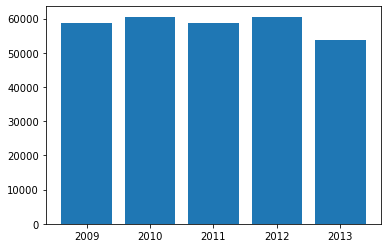

In [16]:
plt.bar(one_rest_date['date'], one_rest_date['product_count'])

<BarContainer object of 5 artists>

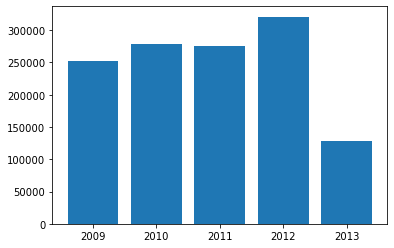

In [17]:
plt.bar(two_rest_date['date'], two_rest_date['product_count'])

In [18]:
best_product5 = product_sales_volume_sort.head().reset_index()
best_product5['product_code']

0    822006
1    822087
2    821012
3    821001
4    822164
Name: product_code, dtype: int64

Text(0.5, 0.98, '')

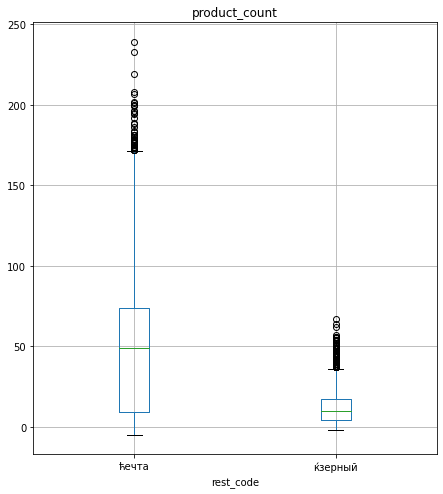

In [19]:
data_trimestr = pd.read_csv('SALE_LIST.csv', sep=';')
data_trimestr = data_trimestr.drop(data_trimestr[(data_trimestr.product_code != 822006) 
                                                 & (data_trimestr.product_code != 822087) 
                                                 & (data_trimestr.product_code != 821012) 
                                                 & (data_trimestr.product_code != 821001) 
                                                 & (data_trimestr.product_code != 822164)].index)
fig, ax = plt.subplots(1, 1, figsize = (7,8))
data_trimestr.boxplot('product_count', by='rest_code', ax=ax).get_figure().suptitle('')


In [20]:
data_trimestr['date'] = data_trimestr['date'].apply(lambda x :x[3:5])
data_trimestr = data_trimestr.groupby('date').sum().reset_index()
data_trimestr

,date,product_code,product_count
0,01,1478968641,47909
1,02,1428840583,50530
2,03,1557828295,57814
3,04,1578349578,64227
4,05,1603833621,63734
5,06,1523298872,61772
6,07,1510202590,55041
7,08,1458455912,50147
8,09,1462560493,57786
9,10,1494598205,54585


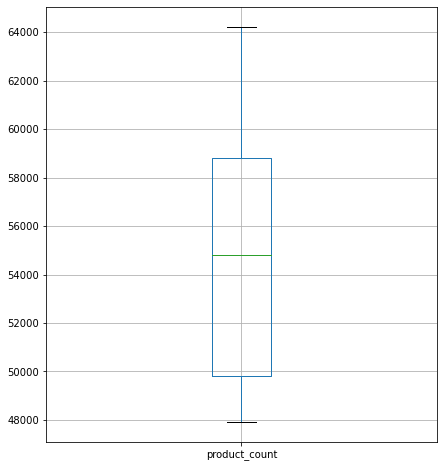

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (7,8))
data_trimestr.boxplot(column='product_count', ax=ax)

In [22]:
data_SALE_LIST.groupby(['rest_code', 'date']).sum().reset_index()

,rest_code,date,product_code,product_count
0,ћечта,2009,12412285208,251686
1,ћечта,2010,13567296143,278505
2,ћечта,2011,14340971833,275637
3,ћечта,2012,14065501527,320849
4,ћечта,2013,7464442407,127757
5,ќзерный,2009,9948320387,58720
6,ќзерный,2010,10093324305,60527
7,ќзерный,2011,10644296963,58663
8,ќзерный,2012,11056014168,60358
9,ќзерный,2013,10553828512,53614


Text(0.5, 0.98, '')

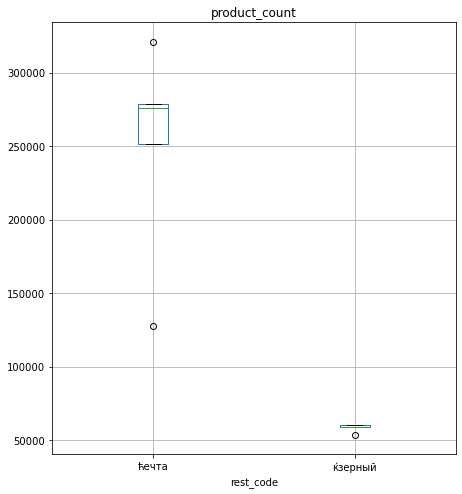

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (7,8))
data_SALE_LIST.groupby(['rest_code', 'date']).sum().reset_index().boxplot('product_count', by='rest_code', ax=ax).get_figure().suptitle('')

In [37]:
data_SALE_LIST['product_count'].max()

239

In [25]:
data_SALE_LIST['product_count'].min()

-6